Data Pre-Processing

Import Packages and CSV

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"bank-additional-full.csv",sep = ';')
# Print shape of dataset
print(df.shape)

(41188, 21)


Data Cleaning

Handling Missing values
Handling Missing values
Handling Duplicates
Check data type
Understand the dataset

In [3]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

In [4]:
features_with_na

[]

There are no null values in the dataset

In [5]:
#Handling Duplicates
df.duplicated().sum()

12

In [6]:
df = df.drop_duplicates()


In [7]:
df.duplicated().sum()

0

Feature Engineering

Feature Extraction

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Type of Features

In [9]:
#Numerical features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 10


In [10]:
#Categorical Features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 11


In [11]:
#Discrete Features
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 3


In [12]:
#Continuous Features
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 7


Split X and Y
Split Dataframe to X and y
Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the y column.

In [13]:
X = df.drop('y', axis=1)
y = df['y']

In [14]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [15]:
# If the target column has yes it is encoded as 1 others as 0
y= np.where(y=='yes', 1,0)

In [16]:
y

array([0, 0, 0, ..., 0, 1, 0])

Feature Transformation

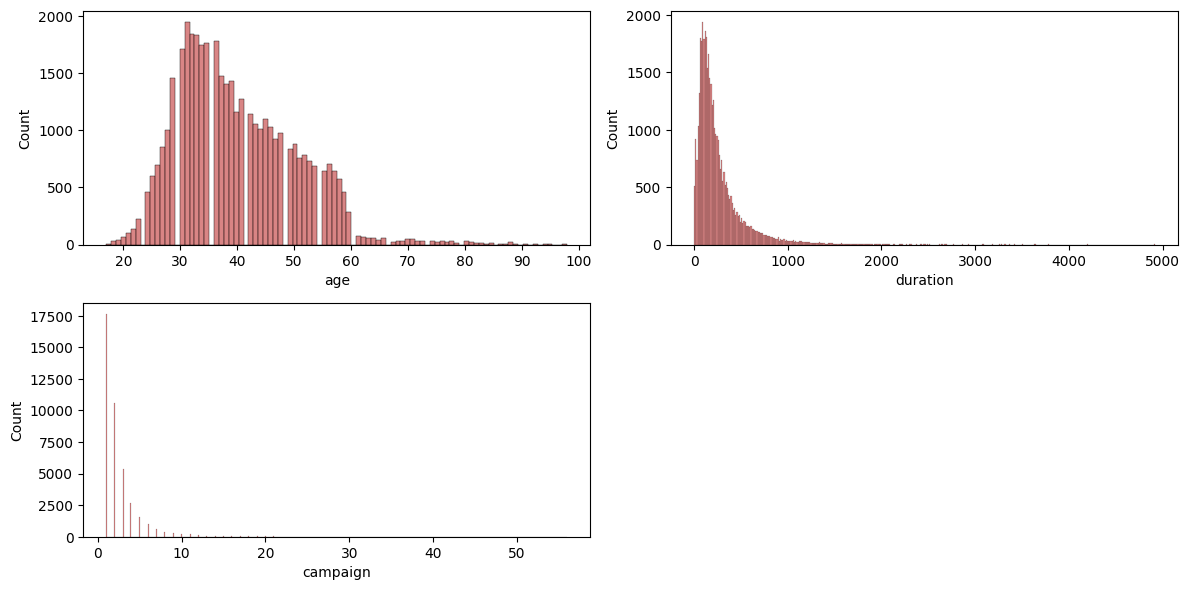

In [18]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['age','duration','campaign']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

Checking Skewness

In [19]:
# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

age               0.784560
duration          3.262808
campaign          4.762044
pdays            -4.921386
cons.price.idx   -0.230853
cons.conf.idx     0.302876
euribor3m        -0.709194
dtype: float64

Apply Power Transformer to Check if it can reduces the outliers

In [24]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['age', 'duration','campaign']
X_copy = pt.fit_transform(X[transform_features])

In [25]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

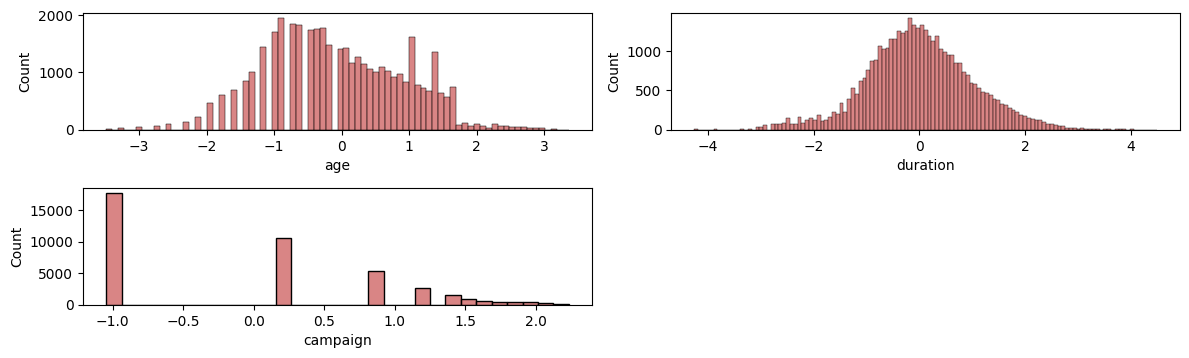

In [34]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [27]:
#Cheking skeness
X_copy.skew(axis=0, skipna=True)

age         0.007335
duration    0.016944
campaign    0.268352
dtype: float64

In [35]:

#Build a function to detect unknown values in catgeorical features
def categ_outliers(df, cat_features):
    results = {}
    for feature in cat_features:
        count = df[df[feature] == "unknown"].shape[0]
        total = len(df[feature])
        unknown_percentage = round((count / total) * 100, 3)
        results[feature] = {"Unknowns count": count,
                            "Unknown percentage": unknown_percentage,
                            }
        if unknown_percentage > 0:
            print(f"the number of unknown values in {feature} = {count}")
            print(f"the percentage of unknown values in {feature} = {unknown_percentage}")
            print("-"*50)
    return results


In [36]:
categorical_cols = cat_features
result = categ_outliers(df, categorical_cols)

the number of unknown values in job = 330
the percentage of unknown values in job = 0.801
--------------------------------------------------
the number of unknown values in marital = 80
the percentage of unknown values in marital = 0.194
--------------------------------------------------
the number of unknown values in education = 1730
the percentage of unknown values in education = 4.201
--------------------------------------------------
the number of unknown values in default = 8596
the percentage of unknown values in default = 20.876
--------------------------------------------------
the number of unknown values in housing = 990
the percentage of unknown values in housing = 2.404
--------------------------------------------------
the number of unknown values in loan = 990
the percentage of unknown values in loan = 2.404
--------------------------------------------------


In [37]:
#Remove the unknown vlaues
df.drop(df[df["job"] == "unknown"].index, inplace=True)
df["job"].value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

In [38]:
df.drop(df[df["marital"] == "unknown"].index, inplace=True)
df["marital"].value_counts()

marital
married     24687
single      11490
divorced     4598
Name: count, dtype: int64

In [39]:
df.drop(df[df["education"] == "unknown"].index, inplace=True)
df["education"].value_counts()

education
university.degree      12092
high.school             9461
basic.9y                6006
professional.course     5222
basic.4y                4118
basic.6y                2263
illiterate                18
Name: count, dtype: int64

In [40]:
df.drop(df[df["housing"] == "unknown"].index, inplace=True)
df["housing"].value_counts()

housing
yes    20573
no     17661
Name: count, dtype: int64

In [41]:

df["loan"].value_counts()

loan
no     32275
yes     5959
Name: count, dtype: int64

In [42]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

job : 11
marital : 3
education : 7
default : 3
housing : 2
loan : 2
contact : 2
month : 10
day_of_week : 5
poutcome : 3
y : 2


Feature Encoding and Scaling
One Hot Encoding for Columns which had lesser unique values and not ordinal

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Ordinal Encoding for Columns which has many unique categories

Ordinal encoding is used here as label encoder is supported for column transformer.
Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.
Standard Scaler

Standardize features by removing the mean and scaling to unit variance.
Power Transformer

Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

Selecting number features for preprocessing

In [29]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [30]:
num_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

Preprocessing using Column Transformer
job : 11
marital : 3
education : 7
default : 3
housing : 2
loan : 2
contact : 2
month : 10
day_of_week : 5
poutcome : 3
y : 2

In [43]:
# Create Column Transformer with 3 types of transformers
or_columns = ['contact','loan','housing']
oh_columns = ['job','marital','education','default','month','day_of_week','poutcome']
transform_columns= ['duration','age']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [44]:
X = preprocessor.fit_transform(X)

In [45]:
X

array([[ 0.        ,  0.        ,  0.        , ...,  0.88656813,
         0.71246263,  0.33169507],
       [ 0.        ,  0.        ,  0.        , ...,  0.88656813,
         0.71246263,  0.33169507],
       [ 0.        ,  0.        ,  0.        , ...,  0.88656813,
         0.71246263,  0.33169507],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -2.22505906,
        -1.49519696, -2.81568858],
       [ 0.        ,  0.        ,  0.        , ..., -2.22505906,
        -1.49519696, -2.81568858],
       [ 0.        ,  0.        ,  0.        , ..., -2.22505906,
        -1.49519696, -2.81568858]])

Classification

In [47]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

In [48]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((52936, 60), (13235, 60))

In [50]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [51]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [52]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [53]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

Model Training

In [54]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9851
- F1 score: 0.9865
- Precision: 0.9802
- Recall: 0.9928
- Roc Auc Score: 0.9843


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9717
- F1 score: 0.9741
- Precision: 0.9746
- Recall: 0.9736
- Roc Auc Score: 0.9715


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9735
- F1 score: 0.9757
- Precision: 0.9702
- Recall: 0.9814
- Roc Auc Score: 0.9727
----------------------------------
Model performance for Test set
- Accuracy: 0.9724
- F1 score: 0.9749
- Precision: 0.9704
- Recall: 0.9794
- Roc Auc Score: 0.9717


Logistic Regression
Model performance for Training 

Results of All Models

In [55]:
base_model_report

,Model Name,Accuracy
4,K-Neighbors Classifier,0.986022
0,Random Forest,0.985115
6,CatBoosting Classifier,0.983906
5,XGBClassifier,0.983604
2,Gradient Boosting,0.972422
1,Decision Tree,0.971666
7,Support Vector Classifier,0.969550
8,AdaBoost Classifier,0.962372
3,Logistic Regression,0.950283


Here we can use Random Forest for Hyper Parameter Tuning

Define the parameter distribution for Random forest

In [56]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [57]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

Create a function for model training and report which can be used in hyperparameter tuning loop

In [58]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 3}
---------------- Best Params for RF -------------------
{'n_estimators': 50, 'max_features': None, 'max_depth': 10}
---------------- Best Params for KNN -------------------
{'weights': 'uniform', 'n_neighbors': 4, 'algorithm': 'auto'}


In [60]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 3},
 'RF': {'n_estimators': 50, 'max_features': None, 'max_depth': 10},
 'KNN': {'weights': 'uniform', 'n_neighbors': 4, 'algorithm': 'auto'}}

Retraining the Model with best Parameters

In [61]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 0.9825
- F1 score: 0.9841
- Precision: 0.9773
- Recall: 0.9910
- Roc Auc Score: 0.9817
----------------------------------
Model performance for Test set
- Accuracy: 0.9737
- F1 score: 0.9762
- Precision: 0.9678
- Recall: 0.9847
- Roc Auc Score: 0.9726


KNeighborsClassifier
Model performance for Training set
- Accuracy: 0.9975
- F1 score: 0.9977
- Precision: 0.9957
- Recall: 0.9998
- Roc Auc Score: 0.9973
----------------------------------
Model performance for Test set
- Accuracy: 0.9924
- F1 score: 0.9931
- Precision: 0.9865
- Recall: 0.9999
- Roc Auc Score: 0.9917


XGBClassifier
Model performance for Training set
- Accuracy: 0.9848
- F1 score: 0.9861
- Precision: 0.9851
- Recall: 0.9870
- Roc Auc Score: 0.9846
----------------------------------
Model performance for Test set
- Accuracy: 0.9816
- F1 score: 0.9831
- Precision: 0.9837
- Recall: 0.9826
- Roc Auc Score: 0.9815




In [62]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.992444
2,XGBClassifier,0.981564
0,Random Forest Classifier,0.973706


In [63]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9924
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5997
           1       0.99      1.00      0.99      7238

    accuracy                           0.99     13235
   macro avg       0.99      0.99      0.99     13235
weighted avg       0.99      0.99      0.99     13235



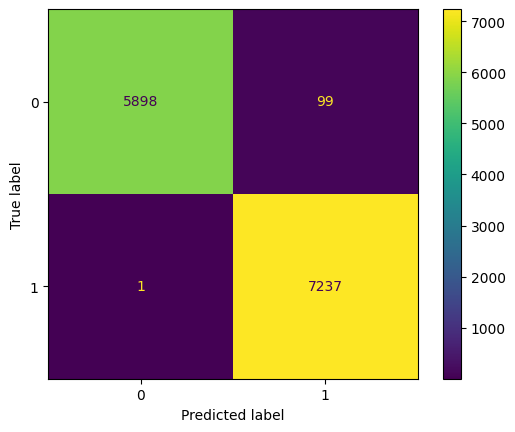

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

Best Model is K-Nearest Neighbor(KNN) with Accuracy 99.2%